In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data
df=pd.read_csv("Wine_Clust.csv")

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
#to check null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
#to check for duplicates
duplicates=df[df.duplicated()]
print("Duplicate rows:\n",duplicates)

Duplicate rows:
 Empty DataFrame
Columns: [Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280, Proline]
Index: []


In [7]:
org_data=df.copy()

In [8]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


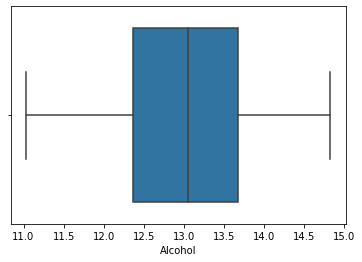

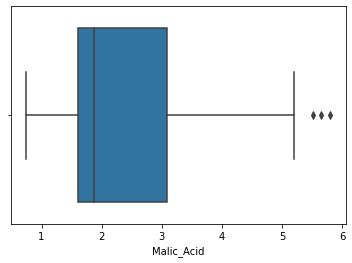

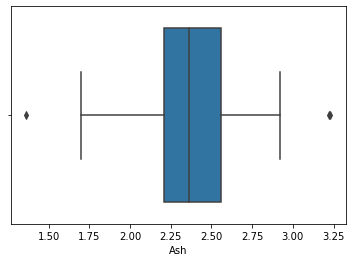

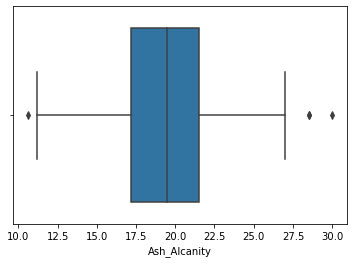

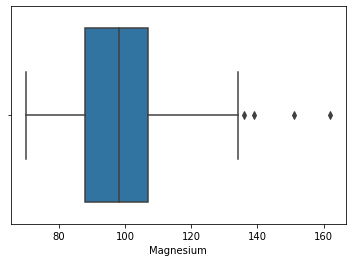

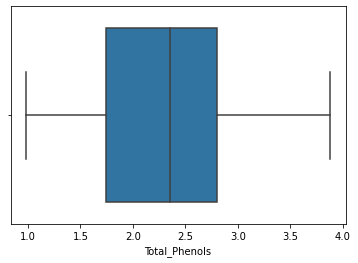

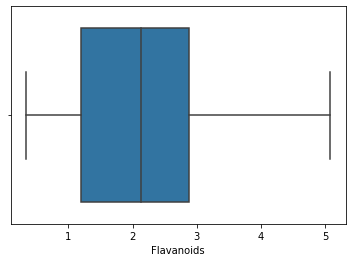

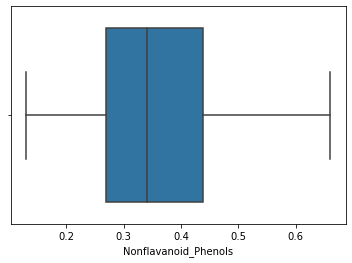

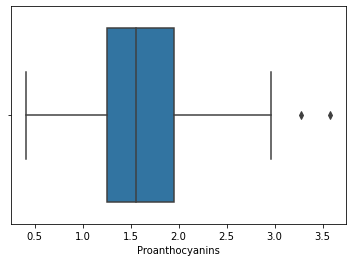

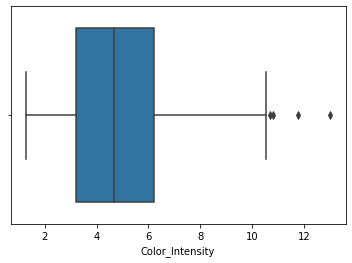

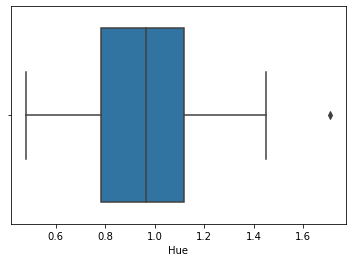

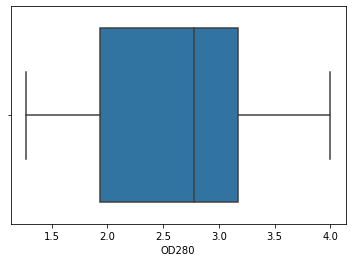

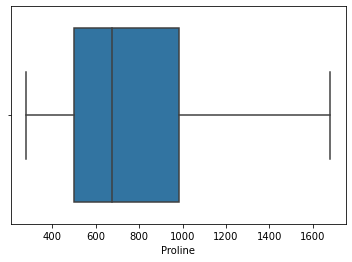

In [10]:
for i in df:
    sns.boxplot(x=df[i])
    plt.show()

In [11]:
from scipy import stats
IQR =stats.iqr(df.Malic_Acid,interpolation='midpoint')
IQR

1.46

In [12]:
Q1=df.Malic_Acid.quantile(0.25)
Q3=df.Malic_Acid.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.5874999999999999, 5.2725)

In [13]:
df.loc[df['Malic_Acid']>max_limit,'Malic_Acid']=np.median(df.Malic_Acid)

In [14]:
from scipy import stats
IQR =stats.iqr(df.Magnesium,interpolation='midpoint')
IQR

19.0

In [15]:
Q1=df.Magnesium.quantile(0.25)
Q3=df.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(59.5, 135.5)

In [16]:
df.loc[df['Magnesium']>max_limit,'Magnesium']=np.median(df.Magnesium)

In [17]:
from scipy import stats
IQR =stats.iqr(df.Color_Intensity,interpolation='midpoint')
IQR

2.97

In [18]:
Q1=df.Color_Intensity.quantile(0.25)
Q3=df.Color_Intensity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.2350000000000003, 10.655000000000001)

In [19]:
df.loc[df['Color_Intensity']>max_limit,'Color_Intensity']=np.median(df.Color_Intensity)


In [20]:
from scipy import stats
IQR =stats.iqr(df.Ash,interpolation='midpoint')
IQR

0.34499999999999975

In [21]:
Q1=df.Ash.quantile(0.25)
Q3=df.Ash.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.6925000000000003, 3.0749999999999997)

In [22]:
df.loc[df['Ash']>max_limit,'Ash']=np.median(df.Ash)
df.loc[df['Ash']<min_limit,'Ash']=np.median(df.Ash)

In [23]:
from scipy import stats
IQR =stats.iqr(df.Ash_Alcanity,interpolation='midpoint')
IQR

4.300000000000001

In [24]:
Q1=df.Ash_Alcanity.quantile(0.25)
Q3=df.Ash_Alcanity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(10.749999999999998, 27.950000000000003)

In [25]:
df.loc[df['Ash_Alcanity']>max_limit,'Ash_Alcanity']=np.median(df.Ash_Alcanity)
df.loc[df['Ash_Alcanity']<min_limit,'Ash_Alcanity']=np.median(df.Ash_Alcanity)

In [26]:
from scipy import stats
IQR =stats.iqr(df.Proanthocyanins,interpolation='midpoint')
IQR

0.7

In [27]:
Q1=df.Proanthocyanins.quantile(0.25)
Q3=df.Proanthocyanins.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.20000000000000018, 3.0)

In [28]:
df.loc[df['Proanthocyanins']>max_limit,'Proanthocyanins']=np.median(df.Proanthocyanins)

In [29]:
from scipy import stats
IQR =stats.iqr(df.Hue,interpolation='midpoint')
IQR

0.3350000000000001

In [30]:
Q1=df.Hue.quantile(0.25)
Q3=df.Hue.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.2799999999999998, 1.6225000000000003)

In [31]:
df.loc[df['Hue']>max_limit,'Hue']=np.median(df.Hue)

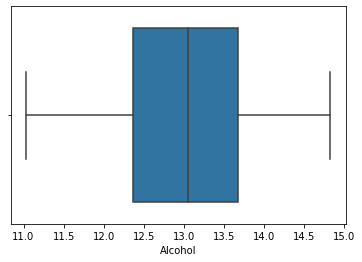

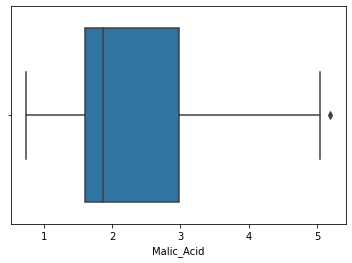

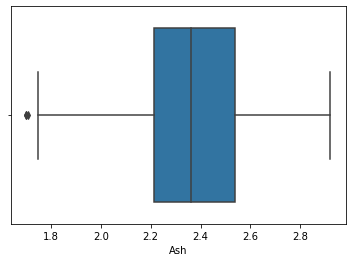

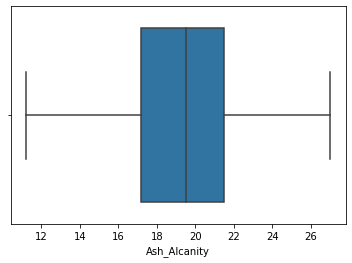

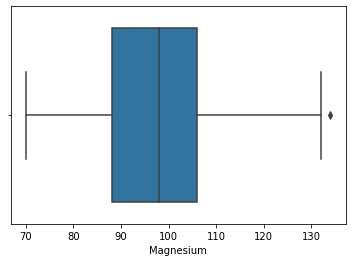

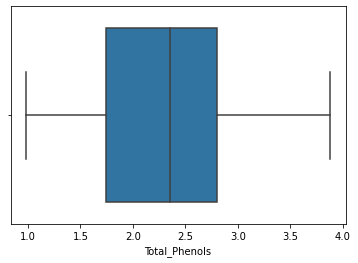

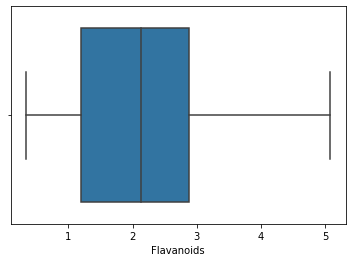

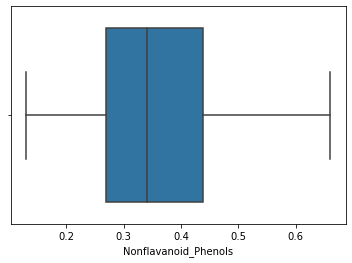

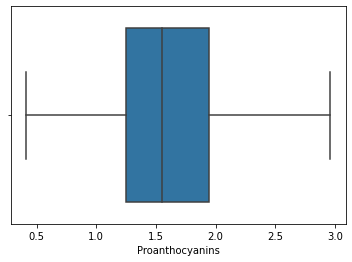

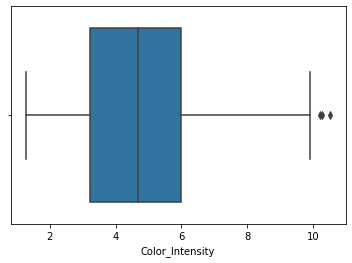

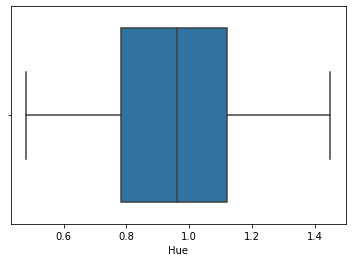

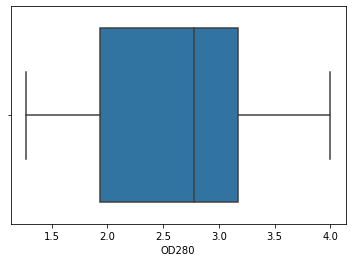

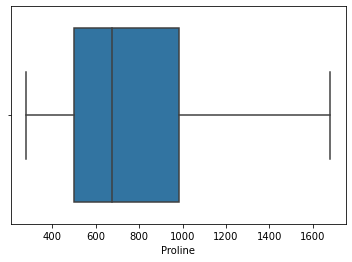

In [32]:
for i in df:
    sns.boxplot(x=df[i])
    plt.show()

# KMEANS

In [33]:
from sklearn.cluster import KMeans

In [34]:
WCSS=[]

In [35]:
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)

E:\PYTHON\arathi\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
WCSS

[17582160.261387885,
 4534368.641958651,
 2361997.4353450816,
 1324466.3899364567,
 908474.1951832976,
 639445.1977869469,
 403886.9724854992,
 315180.5332331952,
 262154.0431208885,
 210888.71605277347,
 180453.9151583559,
 159644.2690043362]

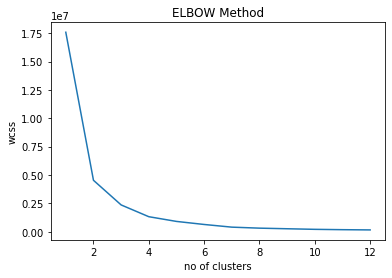

In [37]:
plt.plot(range(1,13),WCSS)
plt.title("ELBOW Method")
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

In [38]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)

In [39]:
y_kmeans

array([2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 3, 0, 3, 0, 3, 3, 0,
       3, 3, 0, 0, 2, 3, 3, 2, 2, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 2, 3, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2,
       2, 0])

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_sc=silhouette_score(df,y_kmeans)
print(silhouette_sc)

0.5628380026862235


# AGGLOMERATIVE HIERARCHIAL CLUSTERING

Text(0, 0.5, 'Euclidian Distance')

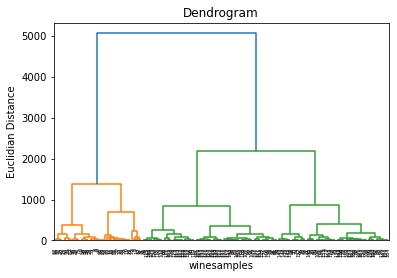

In [42]:
import scipy.cluster.hierarchy as sch
dendrogram  =sch.dendrogram(sch.linkage(df,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('winesamples')
plt.ylabel('Euclidian Distance')

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
hc = AgglomerativeClustering(n_clusters = 2,affinity='euclidean',linkage='ward')

In [45]:
y_hc = hc.fit_predict(df)

In [46]:
from sklearn.metrics import silhouette_score
silhoutte_avg = silhouette_score(df,y_hc)
print(silhoutte_avg)

0.6577293788570644


# PCA

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data,columns=df.columns)

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components = 10)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [50]:
x_pca.shape

(178, 10)

In [51]:
pca.explained_variance_ratio_

array([0.37086336, 0.20332931, 0.0954301 , 0.0694187 , 0.06023354,
       0.04419032, 0.03910542, 0.02895931, 0.02478652, 0.02137276])

In [52]:
np.sum(pca.explained_variance_ratio_)

0.9576893475927891

In [53]:
#SPECIFIYING VARIANCE
pca1 = PCA(n_components = 0.97)
pca1.fit(scaled_data)
x_pca1 = pca1.transform(scaled_data)

In [54]:
x_pca1.shape

(178, 11)

In [55]:
pca1.explained_variance_ratio_

array([0.37086336, 0.20332931, 0.0954301 , 0.0694187 , 0.06023354,
       0.04419032, 0.03910542, 0.02895931, 0.02478652, 0.02137276,
       0.01903084])

In [56]:
np.sum(pca1.explained_variance_ratio_)

0.9767201894301718

# DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

In [58]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [59]:
from sklearn.metrics import silhouette_score

no_of_clusters = []


for p in DBSCAN_params:
    DBS_clustering= DBSCAN(eps=p[0], min_samples=p[1]).fit(df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    

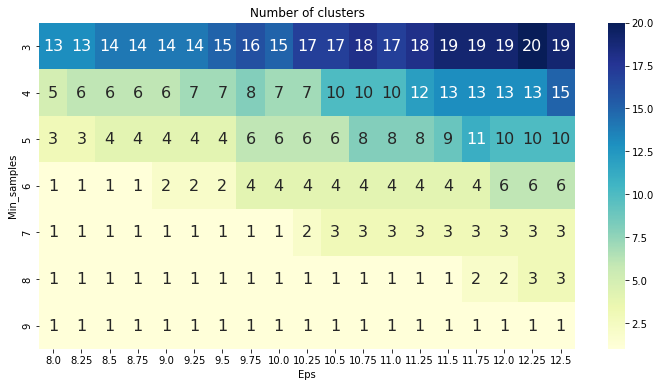

In [60]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [61]:
dbscan=DBSCAN(eps=3,min_samples=15)
y_dbscan=dbscan.fit_predict(scaled_data)

In [62]:
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  1,
        0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [63]:
df["DBSCAN_Cluster"]=y_dbscan
df.tail(50)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,DBSCAN_Cluster
128,12.37,1.630,2.30,24.5,88,2.22,2.45,0.40,1.90,2.120000,0.89,2.78,342,0
129,12.04,4.300,2.38,22.0,80,2.10,1.75,0.42,1.35,2.600000,0.79,2.57,580,0
130,12.86,1.350,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,1
131,12.88,2.990,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,1
132,12.81,2.310,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,1
133,12.70,3.550,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,1
134,12.51,1.240,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,0
135,12.60,2.460,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,1
136,12.25,4.720,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,1
137,12.53,1.865,2.64,25.0,96,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515,1


In [64]:
silhouette_avg = silhouette_score(scaled_data,y_dbscan)
silhouette_avg

0.20688151132182003